In [1]:
#Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("placement.csv")

In [3]:
df.shape

(1000, 3)

In [5]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [6]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


## Detecting Outliers

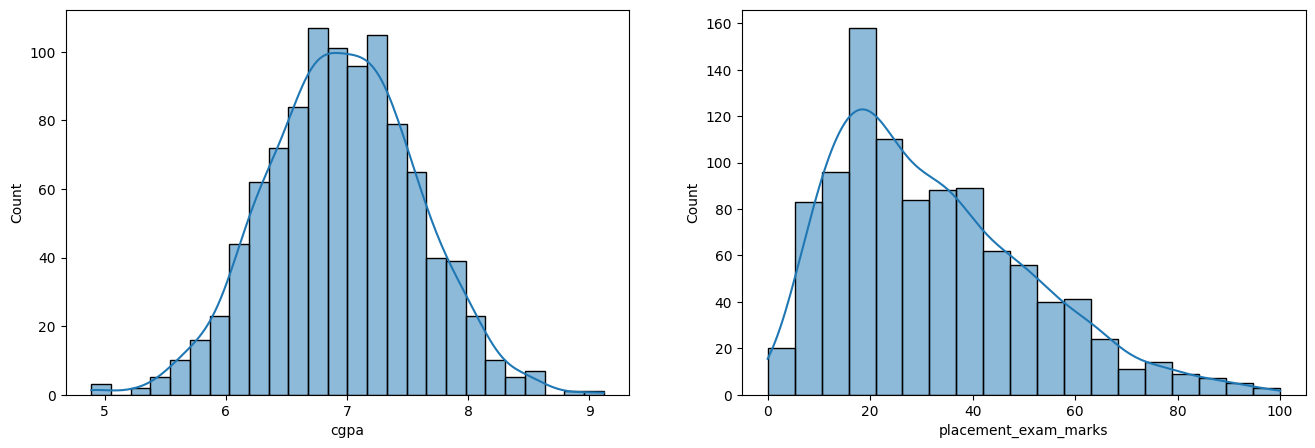

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(df['cgpa'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.show()

## Z Score Method 

#### Dealing with CGPA Column outliers

In [8]:
mean_val=df['cgpa'].mean()
std_val=df['cgpa'].std()
min_val=df['cgpa'].min()
max_val=df['cgpa'].max()

In [9]:
mean_val

6.96124

In [10]:
#Finding Boundary Conditions
upper_limit=mean_val+3*std_val
lower_limit=mean_val-3*std_val

In [11]:
df[(df['cgpa']>upper_limit) | (df['cgpa']<lower_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Two methods to deal with Outliers

## 1. Trimming/Removing

In [13]:
new_df=df[(df['cgpa']<upper_limit) & (df['cgpa']>lower_limit)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [56]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [45]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [46]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [48]:
new_df2 = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [14]:
#Finding Boundary Conditions
upper_limit=mean_val+3*std_val
lower_limit=mean_val-3*std_val

In [16]:
print("Upper Limit:", upper_limit)
print("Lower Limit:", lower_limit)

Upper Limit: 8.808933625397168
Lower Limit: 5.113546374602832


In [18]:
df['cgpa'] = np.where(
    df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        df['cgpa']<lower_limit,
        lower_limit,
        df['cgpa']
    )
)

np.where(x,y,z)

In [19]:
df.shape

(1000, 3)

In [52]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

## IQR Method

<Axes: xlabel='placement_exam_marks'>

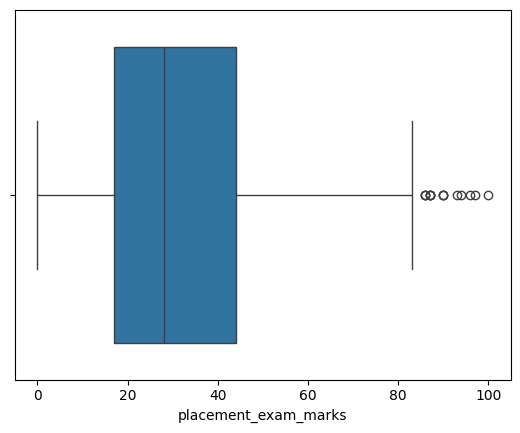

In [20]:
sns.boxplot(df['placement_exam_marks'],orient='y')

In [22]:
#Finding IQR
Q1=df['placement_exam_marks'].quantile(0.25)
Q3=df['placement_exam_marks'].quantile(0.75)

In [23]:
IQR=Q3-Q1

In [24]:
upper=Q3 + 1.5 * IQR
lower=Q1 - 1.5 * IQR

In [66]:
df[(df['placement_exam_marks']>upper) | (df['placement_exam_marks']<lower)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
9,7.75,94.0,1,1.286954
40,6.60,86.0,1,-0.590020
61,7.51,86.0,0,0.895237
134,6.33,93.0,0,-1.030701
162,7.80,90.0,0,1.368561
283,7.09,87.0,0,0.209734
290,8.38,87.0,0,2.315209
311,6.97,87.0,1,0.013876
324,6.64,90.0,0,-0.524734
630,6.56,96.0,1,-0.655306


## 1. Trimming/Removing

In [25]:
trim_df=df[(df['placement_exam_marks']<upper) & (df['placement_exam_marks']>lower)]

In [78]:
trim_df.shape

(985, 4)

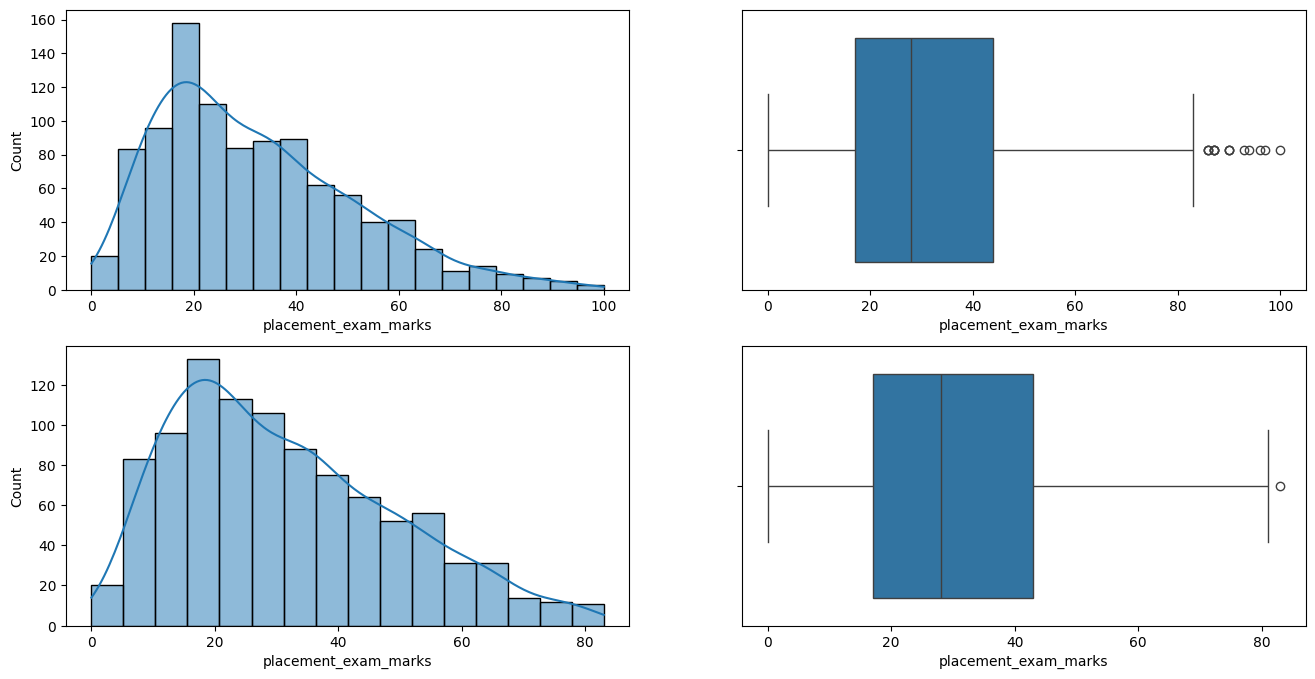

In [26]:
#Graphs to visualize the difference between before outliers and after outliers for Trimming

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='y')

plt.subplot(2,2,3)
sns.histplot(trim_df['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(trim_df['placement_exam_marks'],orient='y')

plt.show()

## 2. Capping

In [27]:
cap_df=df.copy()

cap_df['placement_exam_marks'] = np.where(
    cap_df['placement_exam_marks']>upper,
    upper_limit,
    np.where(
        cap_df['placement_exam_marks']<lower,
        lower_limit,
        cap_df['placement_exam_marks']
    )
)

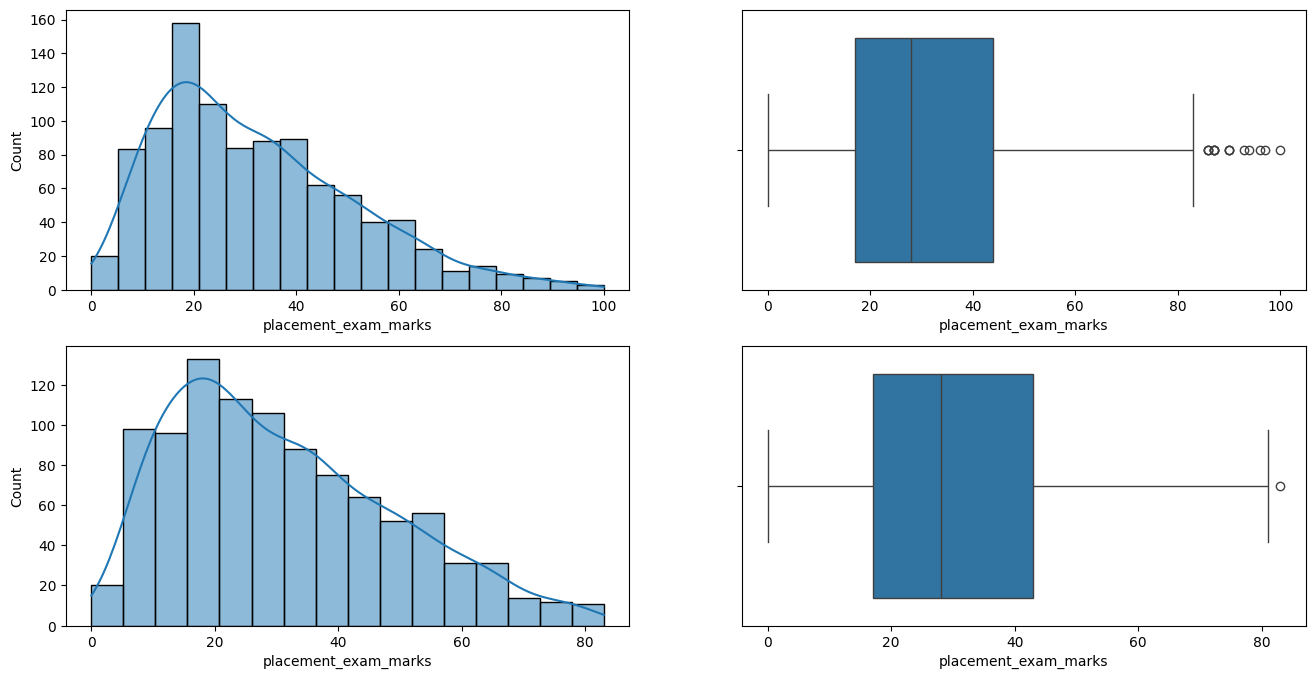

In [28]:
#Graphs to visualize the difference between before outliers and after outliers for Capping

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde=True)

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'],orient='y')

plt.subplot(2,2,3)
sns.histplot(cap_df['placement_exam_marks'],kde=True)

plt.subplot(2,2,4)
sns.boxplot(cap_df['placement_exam_marks'],orient='y')

plt.show()

# 

# New Dataset

In [29]:
df=pd.read_csv('weight-height.csv')

In [30]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [31]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [32]:
df.shape

(10000, 3)

<Axes: xlabel='Height', ylabel='Count'>

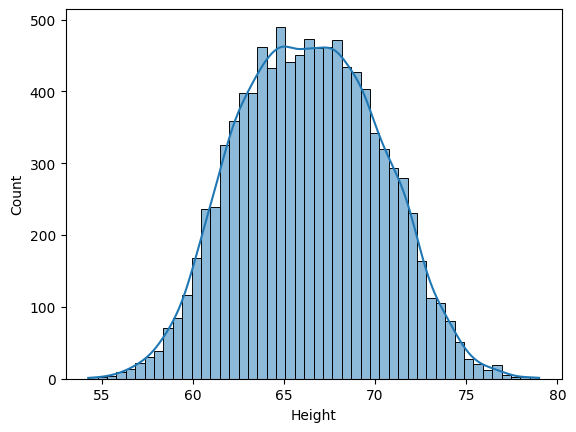

In [33]:
# Visualizing Outliers using Histogram
sns.histplot(df['Height'],kde=True)

<Axes: xlabel='Height'>

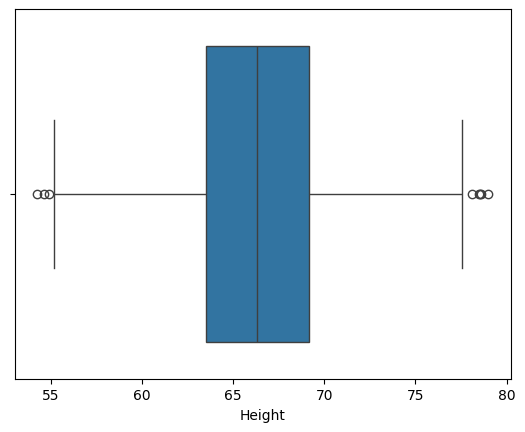

In [34]:
# Visualizing Outliers using Boxplots
sns.boxplot(df['Height'],orient='y')

In [97]:
upper_limit=df['Height'].quantile(0.99)
lower_limit=df['Height'].quantile(0.01)

In [98]:
print("Upper Limit: ", upper_limit)
print("Lower Limit: ", lower_limit)

Upper Limit:  74.7857900583366
Lower Limit:  58.13441158671655


## 1. Trimming/Removing

In [99]:
df_trim=df[(df['Height']<upper_limit) & (df['Height']>lower_limit)]

<Axes: xlabel='Height', ylabel='Count'>

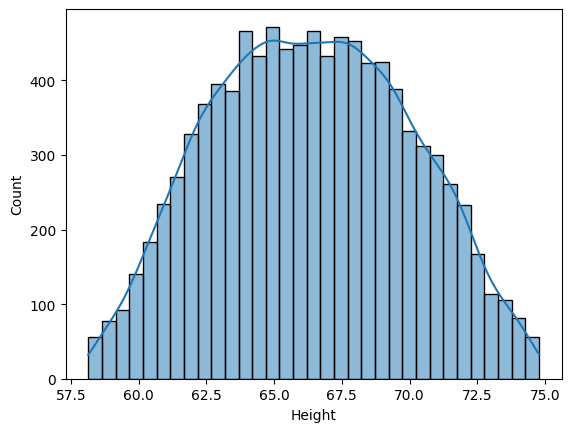

In [101]:
# Visualizing Outliers using Histogram after removing outliers
sns.histplot(df_trim['Height'],kde=True)

<Axes: xlabel='Height'>

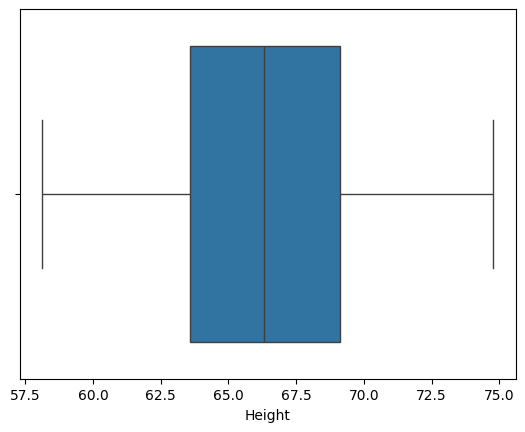

In [102]:
# Visualizing Outliers using Boxplots after removing outliers
sns.boxplot(df_trim['Height'],orient='y')

## 2. Capping -> Winsorization

In [106]:
df_cap=df.copy()

df_cap['Height'] = np.where(
    df_cap['Height']>upper_limit,
    upper_limit,
    np.where(
        df_cap['Height']<lower_limit,
        lower_limit,
        df_cap['Height']
    )
)

<Axes: xlabel='Height', ylabel='Count'>

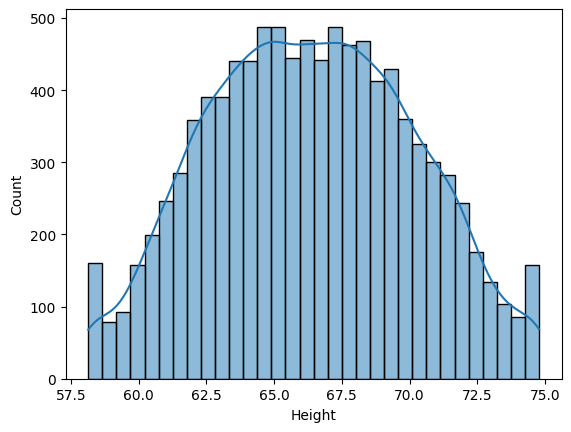

In [107]:
# Visualizing Outliers using Histogram after Winsorization
sns.histplot(df_cap['Height'],kde=True)

<Axes: xlabel='Height'>

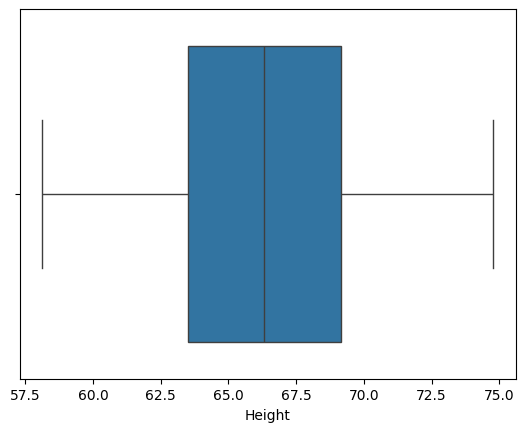

In [109]:
# Visualizing Outliers using Boxplots after removing Winsorization
sns.boxplot(df_cap['Height'],orient='y')